In [1]:
import pandas as pd
import seaborn as sns
import random
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.max_columns = 205
import warnings
warnings.filterwarnings("ignore")
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import time

Commençons par importer le Dataframe résultant du travail de cleaning du notebook précédent 

In [39]:
FinalStatcon = sqlite3.connect('finalstat.sqlite')


In [40]:
FinalStat = pd.read_sql("""SELECT * from FinalStat""", FinalStatcon)


In [41]:
DF = FinalStat.copy()

In [42]:
DF

,level_0,Player,Pos,Age,Tm,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share,Team,index,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,1542.0,11.8,0.564,0.015,0.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,1.4,2.0,3.3,0.103,-1.6,0.1,-1.6,0.2,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
1,1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,2190.0,15.0,0.550,0.062,0.178,3.0,6.6,4.9,10.2,1.8,0.4,9.4,21.7,3.2,2.0,5.2,0.113,0.0,-0.3,-0.3,0.9,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
2,2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,2454.0,20.4,0.613,0.012,0.289,6.6,11.1,9.0,11.5,1.6,1.7,10.9,22.6,6.7,2.7,9.5,0.185,3.5,0.3,3.9,3.6,7.0,780.0,0.009,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
3,3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,3.0,37.7,0.667,0.000,0.000,0.0,36.1,18.9,0.0,0.0,0.0,0.0,40.3,0.0,0.0,0.0,0.349,3.4,0.2,3.6,0.0,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
4,4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,2629.0,22.7,0.603,0.001,0.328,6.0,14.2,10.3,15.7,1.2,2.7,11.7,26.6,7.6,3.2,10.8,0.197,4.4,1.0,5.4,4.9,135.0,780.0,0.173,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18362,18890,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,797.0,15.6,0.562,0.292,0.188,5.3,21.5,13.4,16.5,0.9,3.3,14.0,19.8,0.7,1.0,1.7,0.102,-0.3,0.8,0.5,0.5,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45
18363,18891,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,0.000,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,22.0,1.3,0.357,0.857,0.000,0.0,15.7,7.9,0.0,0.0,0.0,0.0,14.5,0.0,0.0,0.0,-0.075,-6.3,-4.9,-11.2,-0.1,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45
18364,18892,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,1270.0,16.1,0.515,0.152,0.346,5.4,20.2,12.7,7.5,1.5,3.5,7.8,21.4,0.4,1.9,2.3,0.086,-1.0,0.4,-0.6,0.5,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45
18365,18893,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,562.0,14.0,0.558,0.409,0.271,8.4,15.2,11.8,6.2,0.9,4.1,7.7,17.8,0.8,0.5,1.3,0.113,-1.1,-0.9,-2.0,0.0,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45


Intéressons nous aux différentes variables dont nous disposons 

In [43]:
DF.columns

Index(['level_0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_PER_GAME', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year', 'MP_TOT', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share',
       'Team', 'index', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

On peut commencer par retirer les variables artificielles qui se sont rajoutées après une jointure ou export vers une base sql 

In [44]:
DF.drop(columns = ["index","level_0"], inplace = True)

In [45]:
DF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_PER_GAME', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'MP_TOT', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share', 'Team',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

On cherche pour le moment à prédire le prochain MVP. 

Ainsi, il faut choisir une(des) variable(s) cibles qui nous donneront les informations sur le MVP une fois prédites.

Dans la liste des variables disponibles, la variable "Share" semble la plus pertinente à définir comme variable cible.
En effet, cette dernière donne pour chaque joueur la part des points de votes obtenues pour le MVP.

Comme cette variable Share s'obtient par le calcul Pts Won / Pts Max, on ne peut pas se permettre de garder ces variables pour notre modèle car elles nous donnent directement la réponse

In [46]:
DF.drop(columns = ["Pts Won","Pts Max"], inplace = True)

Pour pouvoir entrainer le modèle, il est nécessaire de travailler uniquement sur des variables numériques. Intéressons nous donc aux variables non numériques

In [47]:
DF.select_dtypes(exclude=np.number).columns

Index(['Player', 'Pos', 'Tm', 'Team'], dtype='object')

On voit ici que 4 variables sont concernées :
- "Player" les noms des joueurs
- "Pos" leur position sur le terrain
- "Team" les nom complets de leurs équipes
- "Tm" l'abréviation de leur équipe

On peut déjà supprimer "Tm" qui donnent exactement les mêmes informations que la variable "Team" elle est donc inutile.
Pour les 3 restantes, on va procédérer à un encodage automatique ( on peut se le permettre car il n'y a pas de relation d'ordre pour ces variables)

In [48]:
DF.drop(columns = ["Tm"], inplace = True) 
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
DF['Player'] = labelencoder1.fit_transform(DF['Player'])
DF['Pos'] = labelencoder2.fit_transform(DF['Pos'])
DF['Team'] = labelencoder3.fit_transform(DF['Team'])

Vérifions que la transformation a fonctionné 

In [49]:
DF.dtypes

Player           int32
Pos              int32
Age            float64
G              float64
GS             float64
MP_PER_GAME    float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
2P             float64
2PA            float64
2P%            float64
eFG%           float64
FT             float64
FTA            float64
FT%            float64
ORB            float64
DRB            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
Year             int64
MP_TOT         float64
PER            float64
TS%            float64
3PAr           float64
FTr            float64
ORB%           float64
DRB%           float64
TRB%           float64
AST%           float64
STL%           float64
BLK%           float64
TOV%           float64
USG%           float64
OWS            float64
DWS        

## Analyse descriptive

In [15]:
DF.describe()

,Player,Pos,Age,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
count,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.00000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000
mean,1637.308340,1.989859,26.655417,52.631311,25.694154,20.382627,3.179629,6.990524,0.440154,0.488933,1.414314,0.223679,2.690258,5.575772,0.465131,0.472772,1.572186,2.098432,0.701610,1.020654,2.568900,3.588180,1.907531,0.669571,0.420222,1.244699,1.916426,8.418554,2004.203990,1240.280078,12.751288,0.511353,0.197763,0.308226,5.971865,14.074514,10.024528,13.14092,1.632391,1.540050,14.380842,18.865481,1.356076,1.270729,2.627520,0.071821,-1.504511,-0.188928,-1.693815,0.631959,0.005905,17.153228,39.792630,40.327902,0.496531,15.637129,102.529210,102.644417,-0.110014
std,954.472313,1.426565,4.109382,25.568354,29.253504,10.137225,2.281902,4.724016,0.098775,0.666195,1.761973,0.180892,2.094494,4.113143,0.107806,0.101824,1.437630,1.811859,0.193007,0.859163,1.818513,2.548151,1.879385,0.473188,0.503948,0.824869,0.854206,6.134252,11.693141,914.952943,6.273044,0.098316,0.209616,0.216672,4.869003,6.558558,4.976694,9.48248,1.029009,1.814658,6.523951,5.520022,2.087756,1.222249,3.008963,0.102878,4.038552,1.837855,5.049402,1.365766,0.058708,10.410680,12.750996,12.710905,0.154023,13.019650,7.385396,7.418812,4.530145
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.519000,-68.900000,-31.100000,-92.100000,-2.600000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,801.000000,1.000000,23.000000,32.000000,1.000000,12.000000,1.400000,3.300000,0.404000,0.000000,0.000000,0.000000,1.100000,2.400000,0.430000,0.441000,0.600000,0.800000,0.650000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1995.000000,388.000000,9.900000,0.480000,0.008000,0.191000,2.400000,9.300000,6.200000,6.50000,1.100000,0.400000,10.900000,15.300000,0.000000,0.300000,0.300000,0.037000,-3.200000,-1.000000,-3.500000,-0.100000,0.000000,8.000000,30.000000,31.000000,0.378000,4.000000,96.900000,97.100000,-3.260000
50%,1633.000000,2.000000,26.000000,60.000000,11.000000,19.800000,2.600000,5.900000,0.445000,0.200000,0.600000,0.276000,2.100000,4.400000,0.474000,0.483000,1.100000,1.600000,0.748000,0.800000,2.200000,3.000000,1.300000,0.600000,0.300000,1.100000,1.900000,6.900000,2005.000000,1146.000000,12.900000,0.523000,0.125000,0.277000,4.900000,13.100000,9.200000,10.40000,1.500000,1.000000,13.600000,18.500000,0.600000,0.900000,1.700000,0.080000,-1.300000,-0.200000,-1.400000,0.100000,0.000000,16.000000,41.000000,40.000000,0.512000,14.000000,102.000000,102.500000,0.120000
75%,2467.000000,3.000000,29.000000,76.000000,51.000000,28.900000,4.500000,9.800000,0.488000,0.800000,2.300000,0.358000,3.800000,7.800000,0.512000,0.520000,2.100000,2.800000,0.814000,1.

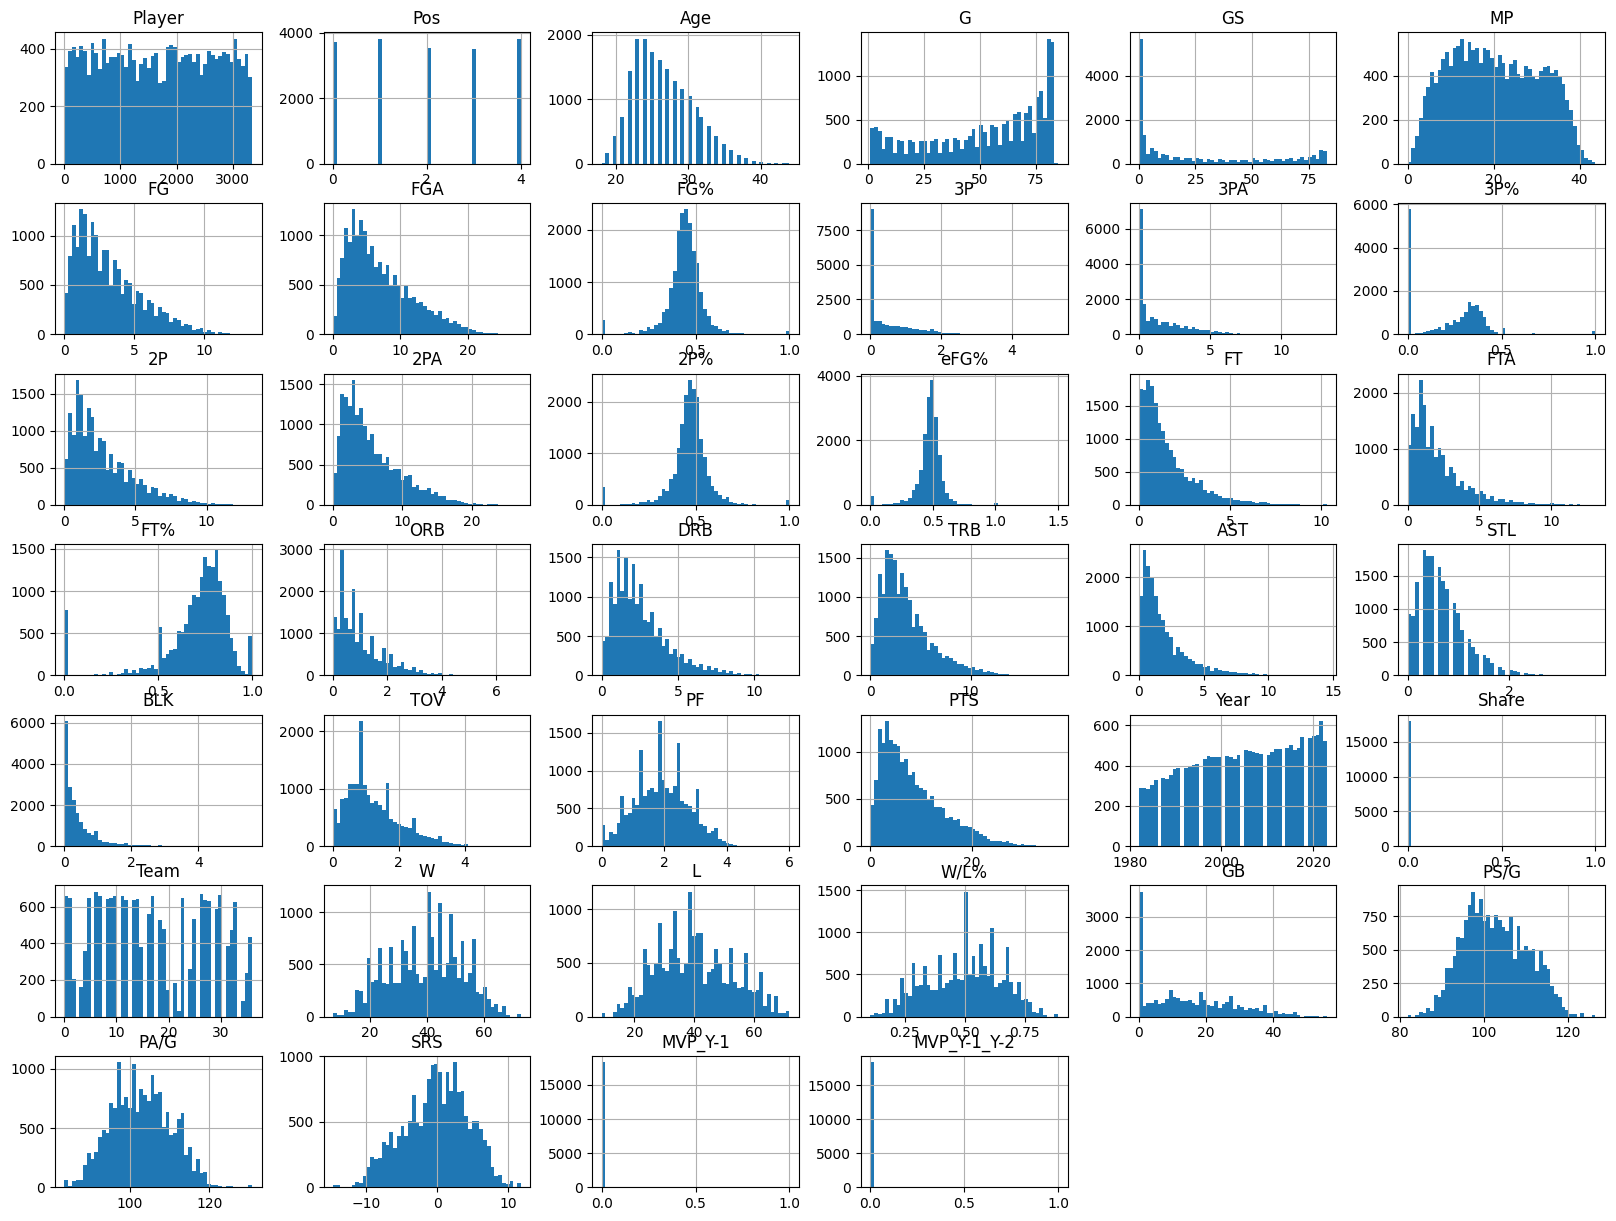

In [112]:
for column in DF.select_dtypes(include=['object']).columns:
    DF[column].value_counts().plot(kind='bar')
    plt.show()

#affiche les histogrammes pour les variables numériques
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
DF.corr()

,Player,Pos,Age,G,GS,MP_PER_GAME,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MP_TOT,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Player,1.000000,0.021943,-0.013577,0.007878,0.000296,-0.005455,0.003116,0.007327,-0.016473,0.012774,0.012379,0.023132,-0.000586,0.003240,-0.009029,-0.009987,-0.015067,-0.019370,0.021624,-0.022139,-0.028603,-0.027893,0.015009,0.000662,-0.026236,-0.002288,-0.019791,0.000104,-0.003722,0.000424,-0.004104,-0.007029,0.018305,-0.026892,-0.015108,-0.039344,-0.032999,0.019431,0.006436,-0.034285,-0.018209,0.015712,-0.002596,-0.010593,-0.006059,-0.006154,0.004570,-0.022383,-0.004600,-0.003894,0.014836,-0.016449,0.009991,-0.005013,0.008292,-0.007605,0.018307,0.011636,0.011748
Pos,0.021943,1.000000,-0.064824,-0.001201,-0.010089,0.094397,0.094924,0.164483,-0.226235,0.361383,0.382678,0.389849,-0.011362,0.025321,-0.128215,-0.070799,0.046131,-0.007669,0.170877,-0.417772,-0.304166,-0.357910,0.199834,0.227197,-0.415947,0.052031,-0.226018,0.120628,0.022261,0.058087,-0.076528,-0.054841,0.422426,-0.219842,-0.485163,-0.555821,-0.603573,0.249199,0.195522,-0.456397,-0.141566,0.151362,0.012906,-0.122868,-0.040930,-0.100163,0.088502,-0.080605,0.041572,0.044503,-0.005338,-0.002713,-0.002367,0.003668,-0.003204,0.002177,0.019663,0.022655,-0.004671
Age,-0.013577,-0.064824,1.000000,0.053259,0.056398,0.093283,0.022927,0.024850,0.009524,0.057824,0.044271,0.027767,0.006610,0.009588,-0.004278,0.031700,0.013070,-0.006011,0.083638,-0.006960,0.072275,0.049218,0.073102,0.024337,-0.002884,0.005991,0.052867,0.026454,-0.057826,0.062972,0.009613,0.039137,0.032581,-0.044275,-0.061892,0.015260,-0.017257,0.045002,-0.045893,-0.049944,0.003853,-0.126351,0.084611,0.086279,0.093824,0.089123,0.058704,0.090280,0.079721,0.076485,0.017938,-0.004815,0.160902,-0.160394,0.166866,-0.130974,-0.057545,-0.158841,0.159763
G,0.007878,-0.001201,0.053259,1.000000,0.619804,0.646547,0.547558,0.526465,0.341754,0.225456,0.209924,0.196945,0.524550,0.514518,0.297783,0.342925,0.438937,0.438977,0.387964,0.387421,0.474786,0.469585,0.384953,0.474816,0.293777,0.479051,0.551085,0.535303,-0.160826,0.853088,0.392503,0.369376,-0.059067,-0.026168,-0.040670,0.045016,0.010038,0.160092,0.018530,0.009826,-0.123212,0.083445,0.517387,0.681224,0.635197,0.378946,0.414205,0.177318,0.395738,0.409554,0.092096,0.006734,0.124952,-0.043039,0.086961,-0.051899,0.033619,-0.023499,0.089101
GS,0.000296,-0.010089,0.056398,0.619804,1.000000,0.829000,0.757231,0.739690,0.260548,0.296040,0.292106,0.140489,0.730741,0.724357,0.221182,0.247217,0.645261,0.648637,0.240378,0.491349,0.659625,0.636546,0.551399,0.616266,0.394937,0.688958,0.595866,0.747080,-0.075611,0.867877,0.428205,0.278399,-0.075987,0.013628,-0.031943,0.105951,0.054782,0.235822,0.026106,0.031080,-0.113297,0.241968,0.666954,0.726526,0.757571,0.324933,0.425607,0.125012,0.385875,0.626997,0.172123,0.002633,0.057727,-0.020946,0.040573,-0.025033,0.011815,-0.014238,0.040827
MP_PER_GAME,-0.005455,0.094397,0.093283,0.646547,0.829000,1.000000,0.892419,0.897693,0.293530,0.447621,0.454504,0.263647,0.829876,0.836378,0.274436,0.320869,0.763756,0.761837,0.385722,0.506601,0.733158,0.694055,0.664826,0.748051,0.387610,0.818670,0.709046,0.891910,-0.036135,0.900047,0.513557,0.364435,0.020315,-0.016601,-0.134089,0.049250,-0.034102,0.323584,0.046906,-0.036588,-0.166999,0.298345,0.675821,0.711928,0.757595,0.389587,0.537567,0.129193,0.476915,0.635119,0.167019,-0.003222,-0.022787,0.029205,-0.027005,0.030270,-0.019682,-0.002649,-0.027195
FG,0.003116,0.094924,0.022927,0.547558,0.757231,0.892419,1.000000,0.981909,0.333376,0.415074,0.419631,0.242595,0.957396,0.948098,0.302577,0.333260,0.855264,0.848425,0.351586,0.475140,0.683089,0.647698,0.613663,0.668223,0.360992,0.831379,0.601635,0.989751,-0.057383,0.813544,0.617574,0.376373,-0.047774,-0.013595,-0.090605,0.063846,-0.002052,0.321458,0.032375,-0.026384,-0.230360,0.565160,0.731916,0.649827,0.7713

In [114]:
DF_corr = DF.corr()
columns = DF.columns
correlated_vars = []
for var1 in columns:
    for var2 in columns:
        if(var1 != var2 and DF_corr[var1][var2]>0.5):
            if([var1,var2] in correlated_vars  or [var2,var1] in correlated_vars):
                pass
            else: 
                correlated_vars.append([var1,var2])


In [115]:
correlated_vars

[['G', 'GS'],
 ['G', 'MP'],
 ['G', 'FG'],
 ['G', 'FGA'],
 ['G', '2P'],
 ['G', '2PA'],
 ['G', 'PF'],
 ['G', 'PTS'],
 ['GS', 'MP'],
 ['GS', 'FG'],
 ['GS', 'FGA'],
 ['GS', '2P'],
 ['GS', '2PA'],
 ['GS', 'FT'],
 ['GS', 'FTA'],
 ['GS', 'DRB'],
 ['GS', 'TRB'],
 ['GS', 'AST'],
 ['GS', 'STL'],
 ['GS', 'TOV'],
 ['GS', 'PF'],
 ['GS', 'PTS'],
 ['MP', 'FG'],
 ['MP', 'FGA'],
 ['MP', '2P'],
 ['MP', '2PA'],
 ['MP', 'FT'],
 ['MP', 'FTA'],
 ['MP', 'ORB'],
 ['MP', 'DRB'],
 ['MP', 'TRB'],
 ['MP', 'AST'],
 ['MP', 'STL'],
 ['MP', 'TOV'],
 ['MP', 'PF'],
 ['MP', 'PTS'],
 ['FG', 'FGA'],
 ['FG', '2P'],
 ['FG', '2PA'],
 ['FG', 'FT'],
 ['FG', 'FTA'],
 ['FG', 'DRB'],
 ['FG', 'TRB'],
 ['FG', 'AST'],
 ['FG', 'STL'],
 ['FG', 'TOV'],
 ['FG', 'PF'],
 ['FG', 'PTS'],
 ['FGA', '3PA'],
 ['FGA', '2P'],
 ['FGA', '2PA'],
 ['FGA', 'FT'],
 ['FGA', 'FTA'],
 ['FGA', 'DRB'],
 ['FGA', 'TRB'],
 ['FGA', 'AST'],
 ['FGA', 'STL'],
 ['FGA', 'TOV'],
 ['FGA', 'PF'],
 ['FGA', 'PTS'],
 ['FG%', '2P%'],
 ['FG%', 'eFG%'],
 ['3P', '3PA'],
 ['3P

In [17]:
corr = DF.corr(method = "pearson")["Share"]
corr

Player         0.014836
Pos           -0.005338
Age            0.017938
G              0.092096
GS             0.172123
MP_PER_GAME    0.167019
FG             0.274083
FGA            0.248238
FG%            0.067381
3P             0.079526
3PA            0.079982
3P%            0.028079
2P             0.273608
2PA            0.250783
2P%            0.061951
eFG%           0.059684
FT             0.318448
FTA            0.319046
FT%            0.045573
ORB            0.120016
DRB            0.219034
TRB            0.196523
AST            0.203404
STL            0.184289
BLK            0.148224
TOV            0.234278
PF             0.074225
PTS            0.287215
Year          -0.018918
MP_TOT         0.175238
PER            0.220526
TS%            0.078395
3PAr          -0.023537
FTr            0.054632
ORB%           0.008179
DRB%           0.080944
TRB%           0.061088
AST%           0.143743
STL%           0.043599
BLK%           0.036140
TOV%          -0.025132
USG%           0

In [18]:
abs_corr = abs(corr)
abs_corr.sort_values()

Pos            0.005338
Team           0.005736
ORB%           0.008179
Player         0.014836
Age            0.017938
Year           0.018918
3PAr           0.023537
TOV%           0.025132
3P%            0.028079
PA/G           0.033899
BLK%           0.036140
PS/G           0.043228
STL%           0.043599
FT%            0.045573
FTr            0.054632
eFG%           0.059684
TRB%           0.061088
2P%            0.061951
FG%            0.067381
PF             0.074225
TS%            0.078395
3P             0.079526
3PA            0.079982
DRB%           0.080944
G              0.092096
DBPM           0.098316
GB             0.102760
ORB            0.120016
SRS            0.121548
L              0.123256
W              0.124661
W/L%           0.127429
AST%           0.143743
BLK            0.148224
WS/48          0.162270
MP_PER_GAME    0.167019
GS             0.172123
MP_TOT         0.175238
STL            0.184289
BPM            0.187792
OBPM           0.190002
TRB            0

Toutes nos variables sont maintenant numériques. Il faut maintenant réfléchir à quel type de modèle serait le plus pertinent dans notre cas.

La variable "Share" étant une variable prenant des valeurs sur tout l'intervalle [0,1], il sera plus judicieux ici de se tourner vers une régression.

In [19]:
years =  sorted(DF["Year"].unique())
years

[1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

L'idée est d'utiliser les résultats des autres années pour prédire une année en particulier

Pour évaluer les performances du modèle, nous allons implémenter une métrique qui va comparer les places des prétendants MVP avec leurs classements réels.

In [20]:
def error_rank_mvp(df,model):
    #DF : Dataframe contenant au minimum la variable "Share"  ainsi que 
    #le classement réel et le classement prédit "Rank_pred", "Rank_reel"
    #On trie le Dataframe sur le classement réel
    df.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    #La variable i va contenir la position du dernier convoqué au MVP.
    #De cette manière en parcourant le Dataframe du début jusqu'à la position i, 
    #nous aurons tous les convoqués au MVP
    
    i= 0
    while df["Share"].iloc[i] > 0:
        i +=1
    print("Nombre de convoqués MVP : {}".format(i))
    rmse = (np.abs(df["Rank_reel"][:i]-df["Rank_pred_{}".format(model)][:i]))**2
    rmse = rmse.sum()/i
    rmse = np.sqrt(rmse)
    diff_top1 = np.abs(df["Rank_reel"].iloc[0]-df["Rank_pred_{}".format(model)].iloc[0])
    return(rmse,diff_top1)

    
    

En plus de cette métrique, implémentons une fonction *pred_to_df* permettant de résumer toutes les étapes dans la création du dataframe final à partir d'une prédiction comme vu dans l'exemple de l'année 2016

In [21]:
def pred_to_df(Y_preds,test,y_column,models):
        
        test["Player"] =  labelencoder1.inverse_transform(test['Player'])
        models_names = list(models.keys())
        
        #Mise sous dataframe des prédictions
        DF_pred = test["Player"]
        for i in range(len(models)):
                
                Y_pred = pd.DataFrame(Y_preds[i],columns = ["Pred_Share_{}".format(models_names[i])],index = test.index)
                
                #Création du dataframe des valeurs prédites avec leurs rangs
                DF_pred = pd.concat([DF_pred,Y_pred],axis = 1,join="inner")
                
                DF_pred.sort_values(by=['Pred_Share_{}'.format(models_names[i])],ascending = False, inplace = True)
                DF_pred["Rank_pred_{}".format(models_names[i])] = 0
                DF_pred["Rank_pred_{}".format(models_names[i])] = DF_pred["Pred_Share_{}".format(models_names[i])].rank(ascending=False, method='min').astype(int)
                
        ##Création du dataframe des valeurs réelles avec leurs rangs
        DF_reel = pd.DataFrame(test[y_column])
        DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
        DF_reel["Rank_reel"] = 0
        DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
        DF_reel.drop(columns = ["Share"], inplace = True)
        #Concaténation
        DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
        DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
        DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
        return DF_year
    
    

Enfin, créons une fonction qui, à partir des données et d'une liste de modèles choisis, renvoie la valeur calculée par la métrique *error_rank_mvp* pour chaque modèle et chaque prédiction qu'il a effectué.

Cette permettra de se rendre compte de la qualité du modèle

In [22]:
def prediction(DF,models,n = 8,selected_features = DF.drop('Share', axis=1).columns,cv = True,year = None ):
    #DF : Dataframe comportant toutes les données exploitables pour l'apprentissage
    #model : Type du modèle que l'on va entrainer pour la prédiction du MVP
    #cv : Booléen qui vaut True si l'utilisateur veut faire de la validation croisée, 0 sinon
    #year : l'année test choisie en cas de non validation croisée
    #n_splits : nombre d'années testées
    #selected_features : variables choisies pour le modèle
    model_performance = pd.DataFrame(columns=['MeanErrorRank','Diff_Rank_MVP_actual/predict','time to train','time to predict','total time'])
    if cv == True:
        years =  sorted(DF["Year"].unique())[-n:-1]
        x_columns =  selected_features
        y_column  = 'Share'
        global_error = 0
        start = []
        end_train = []
        end_predict = []
        for year in years:
            #Construction ensemble apprentissage/test
            train =  DF[DF["Year"] < year]
            test =   DF[DF["Year"] == year]
            Y_preds_MVP = [] 
            #Entrainement du meilleur modèle
            for model in list(models.values()):
                
                start.append(time.time())
                model.fit(train[x_columns], train[y_column])
                end_train.append(time.time())
            #Prédiction
                Y_preds_MVP.append(model.predict(test[x_columns]))
                end_predict.append(time.time())
            
            #Création du Dataframe comportant le classement réel et le classement prédit
            DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
            if year != 2023:
                print(DF_year.head(10))
            #Calcul de l'erreur de prédiction
            for i in range(len(models)):
                #Time
                train_time = end_train[i]-start[i]
                predict_time = end_predict[i]-end_train[i]
                total_time = end_predict[i]-start[i]
                model = list(models.keys())[i]
                
                year_error,diff_top1 = error_rank_mvp(DF_year,model)
                
                model_performance.loc['{}({})'.format(model,year)] = [year_error,diff_top1,train_time,predict_time,total_time] 
                print("Année TEST : {}".format(year)+" Modèle : {}".format(model)+" ERROR RANK: {}\n".format(year_error))
                
        return(models,DF_year,model_performance)
        
    else:
        
        x_columns =  selected_features
        y_column  = 'Share'
        train =  DF[DF["Year"] != year]
        test =   DF[DF["Year"] == year]
        Y_preds_MVP = []
        for model in list(models.values()):
            model.fit(train[x_columns], train[y_column])
            Y_preds_MVP.append(model.predict(test[x_columns]))
        DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
        year_error = error_rank_mvp(DF_year,list(models.keys())[0])[0]
        if year != 2023:
            print(DF_year.head(10))
        print("Année TEST : {}".format(year)+" ERROR RANK: {}\n".format(year_error))
        return(models,year_error,DF_year,model_performance)
   
   
    
    

### Sélection du modèle

Commencons par tester plusieurs types de modèles. Pour cela nous allons optimiser les hyperparamètres des modèles les plus populaires pour un problème de regression : Regression linéaire, RandomForest, ElasticNet

In [23]:
def best_param(model,para_grids,year):
    train = DF[DF["Year"] < year]
    test = DF[DF["Year"] ==year ]
    x_columns =  train.drop(['Share'], axis=1).columns
    y_column  = 'Share'
    reg = model.fit(train[x_columns], train[y_column])
    grid = GridSearchCV(reg, para_grids)
    grid.fit(train[x_columns],train[y_column])
    reg_grid = grid.best_estimator_
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print(grid.best_score_, grid.best_params_)
    bestpm = grid.best_params_
    
    return bestpm
    

In [22]:
para_grids_elasticNET = {
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1], #la part accordée à la pénalité L1 par rapport à la pénalité L2
    'alpha' : [0,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1], #contrôle le poids des pénalités dans l'entraînement du modèle
    'max_iter' : [100, 500, 1000, 1500]
}

In [20]:
para_grids_randomForest = {
    "random_state" : [42],
    "n_estimators" : [10,50,100,200,500],
    "max_features" : ["auto","log2","sqrt"],
    'max_depth': [5,10,20,30],
    }

In [12]:
param_grid_SVM = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [13]:
svm = SVR()
bp_svm = best_param(svm,param_grid_SVM,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-2.2822044682830036 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
en = ElasticNet()
bp_en = best_param(en,para_grids_elasticNET,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.22736268465810255 {'alpha': 0, 'l1_ratio': 0, 'max_iter': 100}


L'ElasticNet semble favoriser une configuration équivalente à la régression linéaire, elle écarte donc les modèles suivants :
ElasticNet
Regression Lasso
Regression Ridge

In [21]:
rf = RandomForestRegressor()
bp_rf = best_param(rf,para_grids_randomForest,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.5373322383795559 {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 500, 'random_state': 42}


- On voit que le modèle est limité par les hyperparamètres qu'on lui a fourni.
- On peut donc en déduire qu'une profondeur de 30 n'est surement pas assez donc on va laisser ce paramètre sans limite
- Pour le n_estimators <=> le nombre d'arbre de décision dans la forêt, il ne semble pas avoir atteint sa limite ce qui veut dire que l'on va devoir se limiter à 500 pour avoir un temps d'éxécution raisonnable pour la suite


Les hyperparamètres étant reglés, nous pouvons tester ces modèles en les entrainement sur les saisons avant 2016 et les testant sur les années suivantes

In [50]:
d = {"reg" : LinearRegression(),"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500),"svm" : SVR(C = 10, gamma= 'scale', kernel= 'rbf')}
models,DF_year,model_performance = prediction(DF,d)

                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
7347       Stephen Curry        0.213205              3       0.782396   
8078       Kawhi Leonard        0.142080              6       0.307496   
16893       LeBron James        0.214722              2       0.461456   
8181   Russell Westbrook        0.197318              4       0.325982   
8175        Kevin Durant        0.215574              1       0.507560   
12090         Chris Paul        0.140064              7       0.105966   
7337      Draymond Green        0.123680              8       0.078258   
3635      Damian Lillard        0.092576             15       0.018930   
8838        James Harden        0.176156              5       0.225992   
9725          Kyle Lowry        0.110512             12       0.054238   

       Rank_pred_rf  Pred_Share_svm  Rank_pred_svm  Share  Rank_reel  
7347              1        0.173974              1  1.000          1  
8078              5        0.123407        

In [51]:
model_performance

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),3.286335,2.0,0.093677,0.003982,0.097660
rf(2016),3.605551,0.0,21.733022,0.078835,21.811857
svm(2016),3.949684,0.0,0.848865,0.022414,0.871279
reg(2017),5.460603,0.0,0.093677,0.003982,0.097660
rf(2017),4.100998,4.0,21.733022,0.078835,21.811857
svm(2017),2.504541,0.0,0.848865,0.022414,0.871279
reg(2018),7.825009,1.0,0.093677,0.003982,0.097660
rf(2018),4.574175,0.0,21.733022,0.078835,21.811857
svm(2018),6.486673,1.0,0.848865,0.022414,0.871279
reg(2019),5.275731,0.0,0.093677,0.003982,0.097660


In [52]:
model_performance.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),3.3,2.0,0.1,0.0,0.1
rf(2016),3.6,0.0,21.7,0.1,21.8
svm(2016),3.9,0.0,0.8,0.0,0.9
reg(2017),5.5,0.0,0.1,0.0,0.1
rf(2017),4.1,4.0,21.7,0.1,21.8
svm(2017),2.5,0.0,0.8,0.0,0.9
reg(2018),7.8,1.0,0.1,0.0,0.1
rf(2018),4.6,0.0,21.7,0.1,21.8
svm(2018),6.5,1.0,0.8,0.0,0.9
reg(2019),5.3,0.0,0.1,0.0,0.1


### Sélection de variables

In [63]:

x_columns =  DF.drop('Share', axis=1).columns
Fi = pd.DataFrame({'Variable' : x_columns,'Fi':models["rf"].feature_importances_})
Fi.sort_values(['Fi'],ascending = False,inplace = True)
Fi.head(20)

,Variable,Fi
49,VORP,0.093101
44,WS,0.085846
42,OWS,0.068667
48,BPM,0.051156
30,PER,0.043976
27,PTS,0.041438
46,OBPM,0.039274
45,WS/48,0.038128
6,FG,0.031784
53,W/L%,0.030643


In [64]:
selected_features = Fi["Variable"].iloc[:20]
output2 = prediction(DF,d,selected_features=selected_features)

                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
7347       Stephen Curry        0.156554              2       0.877508   
8078       Kawhi Leonard        0.127273              6       0.332336   
16893       LeBron James        0.168150              1       0.495890   
8181   Russell Westbrook        0.128171              5       0.284684   
8175        Kevin Durant        0.148426              3       0.502740   
12090         Chris Paul        0.106573              7       0.113874   
7337      Draymond Green        0.094893              9       0.070430   
3635      Damian Lillard        0.060527             25       0.009516   
8838        James Harden        0.128731              4       0.161904   
9725          Kyle Lowry        0.100998              8       0.057628   

       Rank_pred_rf  Pred_Share_svm  Rank_pred_svm  Share  Rank_reel  
7347              1        1.122908              1  1.000          1  
8078              4        0.329101        

In [66]:
model_performance2 = output2[2]
model_performance2.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),5.9,1.0,0.0,0.0,0.0
rf(2016),4.7,0.0,15.6,0.1,15.7
svm(2016),96.5,0.0,0.4,0.0,0.5
reg(2017),6.0,0.0,0.0,0.0,0.0
rf(2017),4.1,4.0,15.6,0.1,15.7
svm(2017),134.3,1.0,0.4,0.0,0.5
reg(2018),6.9,1.0,0.0,0.0,0.0
rf(2018),5.1,0.0,15.6,0.1,15.7
svm(2018),242.7,0.0,0.4,0.0,0.5
reg(2019),6.1,1.0,0.0,0.0,0.0


On constate que l'erreur est un peu plus importante qu'avec toutes les variables mais le classement n'est pas nécessairement moins bon. A noter que cette sélection de variable améliore les performances de la regression lineaire pour l'année 2016 mais les diminue pour l'année 2019.

In [68]:
selected_features2 = Fi["Variable"].iloc[:25]
output3 = prediction(DF,d,selected_features=selected_features2)


                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
7347       Stephen Curry        0.190420              1       0.876902   
8078       Kawhi Leonard        0.140437              5       0.347434   
16893       LeBron James        0.178607              2       0.485348   
8181   Russell Westbrook        0.154986              4       0.320260   
8175        Kevin Durant        0.165357              3       0.493376   
12090         Chris Paul        0.125137              7       0.098432   
7337      Draymond Green        0.102282              9       0.062232   
3635      Damian Lillard        0.070254             18       0.013758   
8838        James Harden        0.140225              6       0.175150   
9725          Kyle Lowry        0.105381              8       0.062256   

       Rank_pred_rf  Pred_Share_svm  Rank_pred_svm  Share  Rank_reel  
7347              1        0.248207              1  1.000          1  
8078              4        0.148199        

In [69]:
model_performance3 = output3[2]
model_performance3.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),3.6,0.0,0.0,0.0,0.0
rf(2016),4.5,0.0,16.2,0.1,16.3
svm(2016),2.4,0.0,0.5,0.0,0.5
reg(2017),6.0,0.0,0.0,0.0,0.0
rf(2017),3.6,4.0,16.2,0.1,16.3
svm(2017),2.1,0.0,0.5,0.0,0.5
reg(2018),6.5,1.0,0.0,0.0,0.0
rf(2018),4.9,0.0,16.2,0.1,16.3
svm(2018),2.2,0.0,0.5,0.0,0.5
reg(2019),5.1,1.0,0.0,0.0,0.0


In [59]:

X = DF.drop('Share', axis=1)
y = DF['Share']

# Sélection des 5 variables les plus importantes avec la méthode f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)
# Obtention des noms des variables sélectionnées
mask = selector.get_support() # masque des variables sélectionnées
selected_features3 = X.columns[mask] # noms des variables sélectionnées

# Affichage des noms des variables sélectionnées
print("Variables sélectionnées : ", selected_features3)

Variables sélectionnées :  Index(['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL',
       'TOV', 'PTS', 'PER', 'USG%', 'OWS', 'DWS', 'WS', 'OBPM', 'BPM', 'VORP'],
      dtype='object')


In [70]:
output4 = prediction(DF,d,selected_features=selected_features3)

                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
7347       Stephen Curry        0.147478              4       0.743028   
8078       Kawhi Leonard        0.123010              6       0.168732   
16893       LeBron James        0.191139              1       0.450810   
8181   Russell Westbrook        0.144578              5       0.335166   
8175        Kevin Durant        0.189010              2       0.484282   
12090         Chris Paul        0.095444              9       0.133062   
7337      Draymond Green        0.102772              8       0.046330   
3635      Damian Lillard        0.076224             17       0.022182   
8838        James Harden        0.147887              3       0.324250   
9725          Kyle Lowry        0.095005             10       0.039908   

       Rank_pred_rf  Pred_Share_svm  Rank_pred_svm  Share  Rank_reel  
7347              1        1.274664              1  1.000          1  
8078              6        0.193641        

In [71]:
model_performance4= output4[2]
model_performance4.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),4.1,3.0,0.0,0.0,0.0
rf(2016),3.1,0.0,17.1,0.1,17.1
svm(2016),16.3,0.0,0.5,0.0,0.5
reg(2017),6.7,0.0,0.0,0.0,0.0
rf(2017),4.6,0.0,17.1,0.1,17.1
svm(2017),43.5,0.0,0.5,0.0,0.5
reg(2018),20.4,1.0,0.0,0.0,0.0
rf(2018),5.8,0.0,17.1,0.1,17.1
svm(2018),151.1,0.0,0.5,0.0,0.5
reg(2019),7.1,1.0,0.0,0.0,0.0


Cette approche semble aider le random forest pour l'année 2017, tout en gardant des résultats convenables pour les autres années. 

### Prediction 2023

Avec toutes les variables

In [74]:
output5 = prediction(DF,d,cv="False",year = 2023)

Nombre de convoqués MVP : 0
Année TEST : 2023 ERROR RANK: nan



In [91]:
output5[2].sort_values(["Pred_Share_rf"],ascending=False).head(10).iloc[:, :-2]

,Player,Pred_Share_reg,Rank_pred_reg,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.232536,1,0.619844,1,0.170291,1
17944,Joel Embiid,0.174737,4,0.485692,2,0.165783,2
284,Giannis Antetokounmpo,0.215542,2,0.389314,3,0.161179,3
376,Luka Dončić,0.187879,3,0.277898,4,0.143730,5
3235,Jayson Tatum,0.121238,7,0.212480,5,0.147770,4
1431,Shai Gilgeous-Alexander,0.127282,6,0.163550,6,0.106919,8
12577,Jimmy Butler,0.107986,8,0.133170,7,0.092632,16
9519,Damian Lillard,0.096581,12,0.119310,8,0.086970,18
4973,Domantas Sabonis,0.130113,5,0.106900,9,0.109186,7
7926,Stephen Curry,0.083415,14,0.104754,10,0.095750,15


Les résultats sont assez cohérent avec ce que l'on entend actuellement, la bataille se jouera entre Jokic et Embiid. 
Un élément important qui n'a pas été pris en compte ici est le "fatigue vote" qui vise à éviter de donner le MVP un joueur qui vient d'en gagner plusieurs.

Avec 20 variables

In [89]:
output6 = prediction(DF,d,selected_features=selected_features,cv="False",year = 2023)

Nombre de convoqués MVP : 0
Année TEST : 2023 ERROR RANK: nan



In [92]:
output6[2].sort_values(["Pred_Share_rf"],ascending=False).head(10).iloc[:, :-2]

,Player,Pred_Share_reg,Rank_pred_reg,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.209101,1,0.620108,1,0.545370,2
17944,Joel Embiid,0.167771,4,0.557742,2,0.565184,1
284,Giannis Antetokounmpo,0.171129,2,0.372376,3,0.459160,3
376,Luka Dončić,0.169085,3,0.264528,4,0.177486,5
3235,Jayson Tatum,0.106024,9,0.244680,5,0.229415,4
1431,Shai Gilgeous-Alexander,0.137912,6,0.185734,6,0.104375,7
12577,Jimmy Butler,0.145780,5,0.126516,7,0.003590,436
9519,Damian Lillard,0.108906,8,0.121668,8,0.065227,114
16507,Donovan Mitchell,0.092606,13,0.096478,9,0.074043,50
7926,Stephen Curry,0.075761,17,0.059374,10,0.051777,238


In [94]:
output7 = prediction(DF,d,selected_features = selected_features2, cv="False",year = 2023)
output7[2].sort_values(["Pred_Share_rf"],ascending=False).head(10).iloc[:, :-2]

Nombre de convoqués MVP : 0
Année TEST : 2023 ERROR RANK: nan



,Player,Pred_Share_reg,Rank_pred_reg,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.206117,1,0.621718,1,0.174426,2
17944,Joel Embiid,0.156301,2,0.547266,2,0.186959,1
284,Giannis Antetokounmpo,0.153859,3,0.394864,3,0.153673,4
376,Luka Dončić,0.151601,4,0.280480,4,0.151419,5
3235,Jayson Tatum,0.102436,8,0.251332,5,0.158163,3
1431,Shai Gilgeous-Alexander,0.119501,6,0.166386,6,0.142954,6
12577,Jimmy Butler,0.128909,5,0.133388,7,0.114804,8
9519,Damian Lillard,0.099302,9,0.091452,8,0.109949,9
16507,Donovan Mitchell,0.092886,10,0.091376,9,0.119760,7
4973,Domantas Sabonis,0.113603,7,0.072786,10,0.094438,13


Avec un peu moins de variables, Embiid passe devant pour le modèle svm

In [95]:
output8 = prediction(DF,d,selected_features = selected_features3,cv="False",year = 2023)
output8[2].sort_values(["Pred_Share_rf"],ascending=False).head(10).iloc[:, :-2]

Nombre de convoqués MVP : 0
Année TEST : 2023 ERROR RANK: nan



,Player,Pred_Share_reg,Rank_pred_reg,Pred_Share_rf,Rank_pred_rf,Pred_Share_svm,Rank_pred_svm
816,Nikola Jokić,0.208632,1,0.628194,1,0.874138,1
17944,Joel Embiid,0.170272,4,0.573678,2,0.552479,2
376,Luka Dončić,0.173496,3,0.423064,3,0.331357,3
284,Giannis Antetokounmpo,0.180044,2,0.293242,4,0.324707,4
1431,Shai Gilgeous-Alexander,0.123885,5,0.212412,5,0.057666,29
3235,Jayson Tatum,0.112154,7,0.173156,6,0.144204,6
12577,Jimmy Butler,0.107388,8,0.139762,7,0.081142,17
9519,Damian Lillard,0.094417,11,0.122462,8,0.024785,77
16507,Donovan Mitchell,0.083631,14,0.106754,9,0.136867,7
9990,Anthony Davis,0.085731,13,0.094812,10,0.004596,186


On peut s'accorder à dire d'après les résultats des modèles que le MVP se jouera entre Jokic et Embiid. 
C'est d'ailleurs ce qui semble être attendu par la communauté suivant la NBA selon les différentes discussions que l'on peut lire sur les réseaux sociaux notamment Twitter. Une tendance semble en cette fin de saison pencher sur Embiid, un des facteurs de cette tendance serait que Jokic vient de gagner 2 MVPS et que les journalistes préfèrent en élire un nouveau.

## BONUS H2O

Pour exploiter les outils que l'on a vu en cours, on s'est proposé de tester le module H2o sur cette problématique pour voir quel genre de modèles il utilise et ses prédictions pour l'année 2023.

In [96]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]<2023]
test = HF[HF["Year"]==2023]
x = HF.columns
y = "Share"
x.remove(y)
aml_2023 = H2OAutoML(max_models=20, seed=1,max_runtime_secs = 500)
aml_2023.train(x=x, y=y, training_frame=train)
lb = aml_2023.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from H:\Desktop\ING3\PFE NBA MVP PREDICTION\PFE\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93
  JVM stdout: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93\h2o_CYTech_Student_started_from_python.out
  JVM stderr: C:\Users\CYTECH~1\AppData\Local\Temp\tmp7g2iiw93\h2o_CYTech_Student_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_CYTech_Student_cjih7t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.698 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:07:25.392: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230415_220725_model_2,0.0305836,0.000935358,0.00409969,0.0231391,0.000935358
GBM_grid_1_AutoML_1_20230415_220725_model_1,0.0305947,0.000936035,0.00449354,0.0231034,0.000936035
GBM_3_AutoML_1_20230415_220725,0.0308278,0.000950354,0.00412986,0.0232902,0.000950354
GBM_5_AutoML_1_20230415_220725,0.0309532,0.000958103,0.00404768,0.0236093,0.000958103
GBM_4_AutoML_1_20230415_220725,0.0310422,0.00096362,0.00414133,0.0235187,0.00096362
GBM_grid_1_AutoML_1_20230415_220725_model_3,0.0311934,0.000973026,0.0045094,0.023557,0.000973026
XRT_1_AutoML_1_20230415_220725,0.0313019,0.000979806,0.00417805,0.023495,0.000979806
DRF_1_AutoML_1_20230415_220725,0.0313673,0.00098391,0.00415604,0.0235218,0.00098391
GBM_2_AutoML_1_20230415_220725,0.0316038,0.000998802,0.00424595,0.0239535,0.000998802
GBM_grid_1_AutoML_1_20230415_220725_model_4,0.032149,0.00103356,0.00503366,0.0244226,0.00103356


In [125]:
preds_2023 = aml_2023.predict(test)
test["Pred_Share_aml"] = preds_2023
DF_PRED_H2O_2023 = pred_to_df([test["Pred_Share_aml"].as_data_frame()],test.as_data_frame(),"Share",{"aml":aml_2023})

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [134]:
DF_PRED_H2O_2023.sort_values(["Pred_Share_aml"],ascending=False).head(10)

,Player,Pred_Share_aml,Rank_pred_aml,Share,Rank_reel
520,Joel Embiid,0.619654,1,0,1
67,Nikola Jokić,0.587607,2,0,1
3,Giannis Antetokounmpo,0.445929,3,0,1
31,Luka Dončić,0.350299,4,0,1
130,Jayson Tatum,0.273319,5,0,1
105,Shai Gilgeous-Alexander,0.181693,6,0,1
462,Donovan Mitchell,0.118500,7,0,1
185,Domantas Sabonis,0.090428,8,0,1
379,Jimmy Butler,0.086426,9,0,1
129,Jaylen Brown,0.080701,10,0,1
